## Implementação da Tranformada Discreta de Fourier - DFT 

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import unit_impulse

# Sinal no tempo de discreto
$x(n) =
\begin{cases} 
1, & \frac{N1}{2} \leq n < \frac{N1}{2} \\
0, & \text{c.c.}
\end{cases}$



In [15]:
def f(n, N1):
    if n >= -N1 and n <= N1:
        return 1
    return 0

# DFT

Representação matricial

Vamos iniciar relembrando que a Transformada Discreta de Fourier (DFT) é uma representação discreta do espectro de frequências de sinais no tempo discreto x(n), cuja expressão é dada por:

$X[k] = \sum_{n=0}^{N-1} x(n) W_N^{kn}$,


sendo


$W_N = e^{-j\frac{2\pi}{N}}$.

Para um determinado \( k \) temos

$X[k] = x(0)e^{-j\frac{2\pi k \cdot 0}{N}} + x(1)e^{-j\frac{2\pi k \cdot 1}{N}} + \dots + x(N-1)e^{-j\frac{2\pi k (N-1)}{N}}$

que pode ser escrita como

$X[k] = 
\begin{bmatrix} 
1 & e^{-j\frac{2\pi k}{N}} & e^{-j\frac{2\pi k \cdot 2}{N}} & \dots & e^{-j\frac{2\pi k (N-1)}{N}}
\end{bmatrix}
\begin{bmatrix} 
x(0) \\ 
x(1) \\ 
x(2) \\ 
\vdots \\ 
x(N-1)
\end{bmatrix}$

estendendo essa representação para todos os valores de \( k \) obtemos

$\mathbf{X} =
\begin{bmatrix} 
1 & 1 & 1 & \dots & 1 \\ 
1 & e^{-j\frac{2\pi}{N}} & e^{-j\frac{2\pi \cdot 2}{N}} & \dots & e^{-j\frac{2\pi (N-1)}{N}} \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
1 & e^{-j\frac{2\pi (N-1)}{N}} & e^{-j\frac{2\pi (N-1) \cdot 2}{N}} & \dots & e^{-j\frac{2\pi (N-1)(N-1)}{N}} 
\end{bmatrix}
\begin{bmatrix} 
x(0) \\ 
x(1) \\ 
\vdots \\ 
x(N-1)
\end{bmatrix}$



[[-2 -1  0  1  2]]


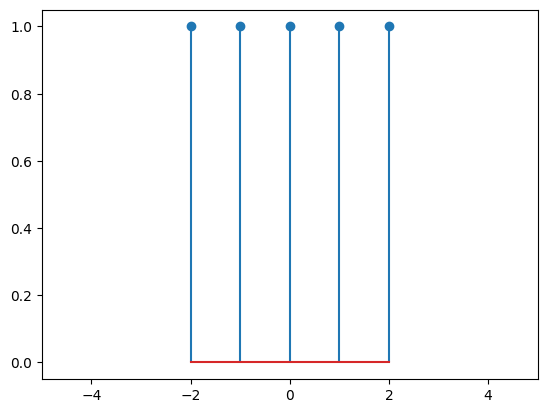

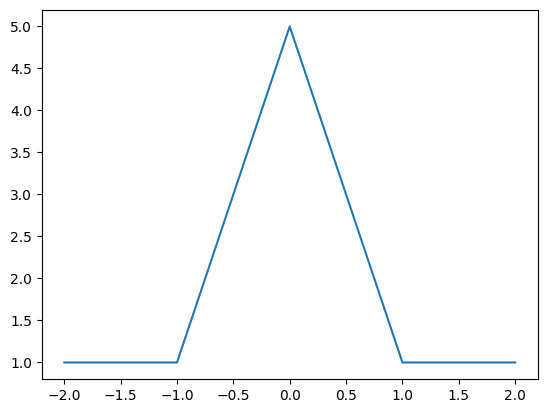

In [ ]:
N = 4 # Tamanho da DFT

N1 = 2 # Tamanho da porta simétrica em y

k = np.array([np.arange(-N//2, (N+2)//2)]) # Número de amostras

n = np.arange(-N//2, (N+2)//2) # Índice do somatório


func = np.array([f(i, N1) for i in n]) # Sinal no tempo discreto
func_T = func.reshape(-1, 1)

Wn = np.exp(-2j*np.pi/N)

k_T = k.T

M_result = Wn**(k_T*n) 

DFT = M_result @ func_T

plt.figure()
plt.stem(n,func)
plt.xlim(-5,5)

plt.figure()
plt.plot(k_T,np.abs(DFT))


In [11]:
import numpy as np
from IPython.display import display, Math

def print_latex_matrix(A):
    """Imprime uma matriz (real ou complexa) de qualquer dimensão em formato LaTeX no notebook Jupyter."""
    
    A = np.atleast_2d(A)  # Converte para matriz 2D se for um vetor ou escalar

    if A.ndim > 2:
        raise ValueError("Apenas matrizes 1D ou 2D são suportadas para exibição em LaTeX.")

    def format_complex(z):
        """Formata um número real ou complexo para exibição em LaTeX."""
        if isinstance(z, complex) or np.iscomplexobj(z):
            real_part = f"{z.real:.2f}" if z.real != 0 else ""
            imag_part = f"{abs(z.imag):.2f}j" if z.imag != 0 else ""
            sign = "+" if z.imag > 0 and z.real != 0 else "-"
            return f"{real_part}{sign}{imag_part}" if (z.real or z.imag) else "0"
        return f"{z:.2f}"  # Formata números reais com 2 casas decimais

    matrix_latex = r"\begin{bmatrix}" + " \\\\ ".join(
        [" & ".join(map(format_complex, row)) for row in A]
    ) + r"\end{bmatrix}"
    
    display(Math(matrix_latex))

print_latex_matrix(k_T)
# print_latex_matrix(DFT)

<IPython.core.display.Math object>